# Introduction
We use a pretty wide data set. While this notebook servers as the core presentation of the steps and code, we should run most of this in stand-alone.


# Setup and Data

In [3]:
import sys, os
jp = os.path.join
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
#import statsmodels as stm
import seaborn as sb

In [2]:
ls -l data/manfct80s.csv

lrwxrwxrwx 1 pmolnar pmolnar 103 Jan 25 15:33 data/manfct80s.csv -> /home/pmolnar/Projects/Longitudinal/data/Manufacturer_quarterly/manufacturer_data_from_1980_to_1989.csv


In [7]:
df = pd.read_csv(jp('data', 'manfct80s.csv'), low_memory=False)
print "Nrows %d, Ncols %d"%(df.shape[0], df.shape[1])

Nrows 6182, Ncols 680


In [9]:
df.dtypes

gvkey         int64
datadate      int64
fyearq        int64
fqtr          int64
fyr           int64
indfmt       object
consol       object
popsrc       object
datafmt      object
tic          object
cusip        object
conm         object
acctchgq    float64
acctstdq    float64
adrrq       float64
ajexq       float64
ajpq        float64
bsprq        object
compstq      object
curcdq       object
curncdq      object
currtrq     float64
curuscnq    float64
datacqtr     object
datafqtr     object
finalq       object
ogmq        float64
rp           object
scfq        float64
srcq          int64
             ...   
addzip       object
busdesc      object
city         object
conml        object
county       object
dlrsn       float64
ein          object
fax          object
fyrc          int64
ggroup      float64
gind        float64
gsector     float64
gsubind     float64
idbflag      object
incorp       object
loc          object
naics         int64
phone        object
prican       object


In [14]:
import plotly.plotly as py
from plotly.graph_objs import *

In [22]:
data = Data(df[['srcq', 'scfq']])

PlotlyListEntryError: Invalid entry found in 'data' at index, '0'

Path To Error: [0]

Valid items for 'data' at path [] under parents []:
    ['Mesh3d', 'Scattercarpet', 'Scatterternary', 'Surface', 'Sankey',
    'Table', 'Contour', 'Carpet', 'Contourcarpet', 'Area', 'Ohlc',
    'Heatmap', 'Scattermapbox', 'Scatter3d', 'Pointcloud', 'Scattergl',
    'Histogram', 'Pie', 'Heatmapgl', 'Histogram2d', 'Scattergeo', 'Box',
    'Bar', 'Choropleth', 'Candlestick', 'Parcoords', 'Histogram2dcontour',
    'Scatter']

Entry should subclass dict.

In [28]:
df[d

,gvkey,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,tic
0,1081,19810331,1981,1,12,INDL,C,D,STD,ABY.2
1,1081,19810630,1981,2,12,INDL,C,D,STD,ABY.2
2,1081,19810930,1981,3,12,INDL,C,D,STD,ABY.2
3,1081,19811231,1981,4,12,INDL,C,D,STD,ABY.2
4,1081,19820331,1982,1,12,INDL,C,D,STD,ABY.2
5,1081,19820630,1982,2,12,INDL,C,D,STD,ABY.2
6,1081,19820930,1982,3,12,INDL,C,D,STD,ABY.2
7,1081,19821231,1982,4,12,INDL,C,D,STD,ABY.2
8,1081,19830331,1983,1,12,INDL,C,D,STD,ABY.2
9,1081,19830630,1983,2,12,INDL,C,D,STD,ABY.2


In [71]:
descr_tbl = df.describe().transpose()
descr_tbl.head()

,count,mean,std,min,25%,50%,75%,max
gvkey,6182.0,7.450283e+03,4359.761376,1081.0,3833.0,6573.0,10312.0,25923.0
datadate,6182.0,1.985453e+07,28048.624840,19800630.0,19830831.0,19860228.0,19880531.0,19900531.0
fyearq,6182.0,1.985382e+03,2.815802,1980.0,1983.0,1986.0,1988.0,1990.0
fqtr,6182.0,2.474604e+00,1.119716,1.0,1.0,2.0,3.0,4.0
fyr,6182.0,8.773374e+00,3.584185,1.0,6.0,10.0,12.0,12.0


In [51]:
import StringIO
output = StringIO.StringIO()
descr_tbl[descr_tbl['count']>0].to_html(output, float_format=lambda x: '%12.4f'%x)
##output.close()


In [57]:
with open(jp('www', 'desciption.html'), 'w') as out:
    out.write("""
    <html>
    <head>
    <style>
    table {border: 1px gray;}
    td {padding: 1em 0.3em; text-align: right;}
    </style>
    </head>
    <body>
    """)
    out.write(output.getvalue())
    out.write("""
    </body>
    </html>
    """)

In [69]:
s = "%s"%(descr_tbl.loc['datadate'])

In [70]:
s

'count    6.182000e+03\nmean     1.985453e+07\nstd      2.804862e+04\nmin      1.980063e+07\n25%      1.983083e+07\n50%      1.986023e+07\n75%      1.988053e+07\nmax      1.990053e+07\nName: datadate, dtype: float64'

## Plotting Histograms

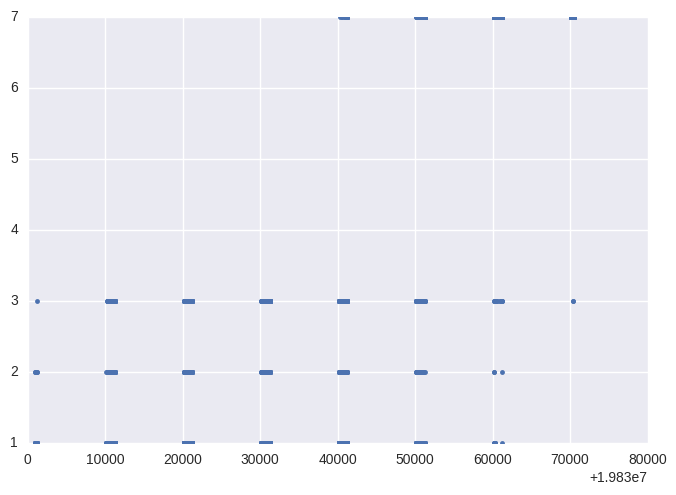

In [62]:
plt.plot(df['datadate'], df['scfq'], '.')

In [66]:
import datetime
df['date'] = df.datadate.apply(lambda d: datetime.datetime.strptime(str(d), "%Y%m%d"))

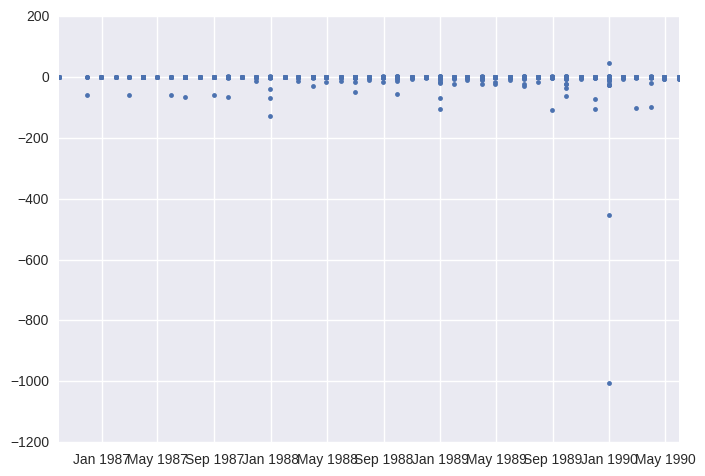

In [68]:
plt.plot(df['date'], df['sppivy'], '.')

Headless plotting


In [77]:
descr_tbl.loc['adrrq']['max']-descr_tbl.loc['adrrq']['min']

9.9900000000000002

In [ ]:
df.gvkey

In [83]:
df.groupby('gvkey').max()

,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,tic,cusip,...,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate,date
gvkey,,,,,,,,,,,,,,,,,,,,,
1081,19900331,1990,4,12,INDL,C,D,STD,ABY.2,003924107,...,2621,400,970,B-,QC,0,NaN,20071015.0,NaN,1990-03-31
1408,19900331,1990,4,12,INDL,C,D,STD,BEAM,073730103,...,2085,325,978,B,IL,0,www.beamsuntory.com,20140501.0,NaN,1990-03-31
1429,19900531,1990,4,8,INDL,C,D,STD,2388B,025303108,...,2060,250,978,NaN,MN,3,www.crystalsugar.com,20130723.0,NaN,1990-05-31
1491,19900331,1990,4,12,INDL,C,D,STD,HAIPF,M52514102,...,2621,400,970,NaN,NaN,3,www.hadera-paper.co.il,NaN,NaN,1990-03-31
1496,19900331,1990,4,12,INDL,C,D,STD,ALGI,027284108,...,2540,315,976,C,NV,3,www.americanlocker.com,NaN,19870609.0,1990-03-31
1663,19900331,1990,4,12,INDL,C,D,STD,BUD.2,035229103,...,2082,140,978,A+,MO,0,www.anheuser-busch.com,20081118.0,NaN,1990-03-31
1722,19900331,1990,4,6,INDL,C,D,STD,ADM,039483102,...,2070,112,970,B+,IL,0,www.adm.com,NaN,NaN,1990-03-31
1932,19900331,1990,4,12,INDL,C,D,STD,BTI,110448107,...,2111,470,978,NaN,NaN,0,www.bat.com,NaN,NaN,1990-03-31
1969,19900331,1990,4,12,INDL,C,D,STD,BPMI,056543101,...,2621,400,970,C,WI,3,www.bpmpaper.com,20051017.0,NaN,1990-03-31
